## 1. Problem Statement

#### The goal of is to find out how Student Performance(Test Scores) are affected by other
#### features like gender, Parental Eduction ,Ethnicity etc

## 2. Importing important libraries like Pandas,Numpy etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Reading the data from the CSV File

In [2]:
df = pd.read_csv("C:\\Projects\\DataScienceEndToEnd\\student-performance\\notebook\\data\\stud.csv")

## 4. Show first 5 Rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 5. EDA

### 5.1 Doing Univariate Analysis

In [4]:
df.shape

(1000, 8)

#### Insight : This data contains ***1000 rows*** and ***8 columns***

In [5]:
# Datatypes of every columns
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [6]:
# Code to seperate the categorical columns and the numerical columns
def seperate_cat_num(data):
    threshold = 0.05 * data.shape[0]
    cat = []
    num = []
    for i in data.columns:
        if data[i].nunique()<threshold:
            cat.append(i)
        else:
            num.append(i)
    return cat,num

In [7]:
cat,num = seperate_cat_num(df)

In [8]:
cat # This implies that we have 5 categorical columns in the dataset 

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [9]:
num # we have 3 numerical column in the dataset

['math_score', 'reading_score', 'writing_score']

#### Insight : We have ***<u>5 categorical columns</u>*** in the dataset and ***<u>3 numerical columns</u>*** in the dataset

In [10]:
def analyze_cat(catColumn):
    plt.figure(figsize=(10,6))
    plt.title(f"Column: {catColumn}")
    plt.xlabel(catColumn)
    plt.ylabel('total_values')
    df[catColumn].value_counts().plot(kind='bar')
    print(df[catColumn].value_counts())
    plt.show()
    plt.figure(figsize=(10,6))
    plt.title(f"Column: {catColumn}")
    df[catColumn].value_counts().plot(kind="pie",autopct="%.2f")
    plt.show()

gender
female    518
male      482
Name: count, dtype: int64


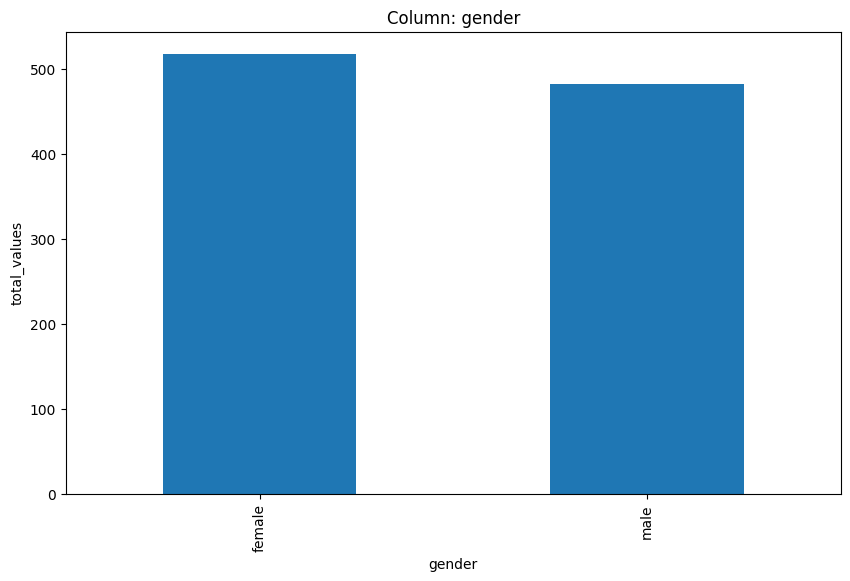

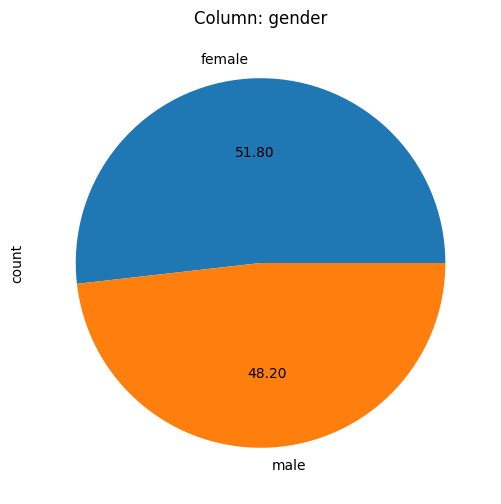

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


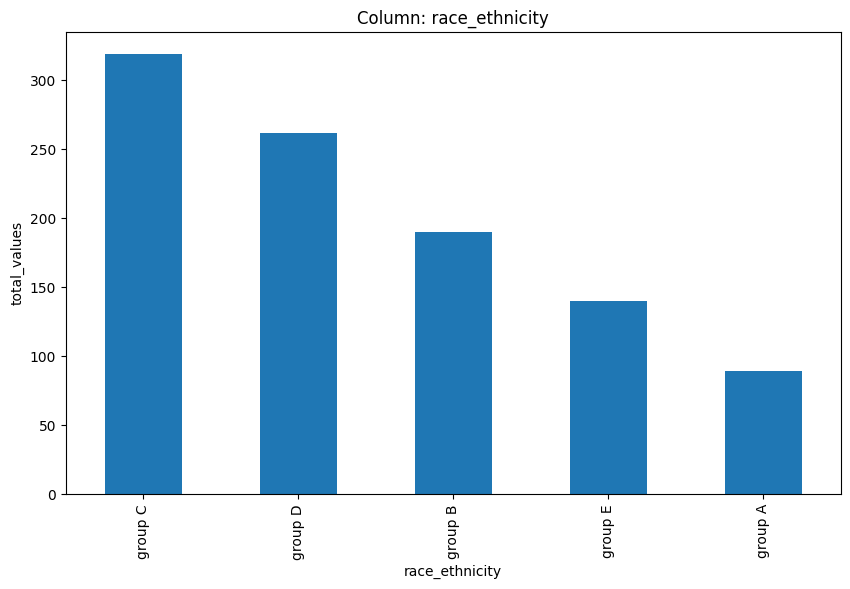

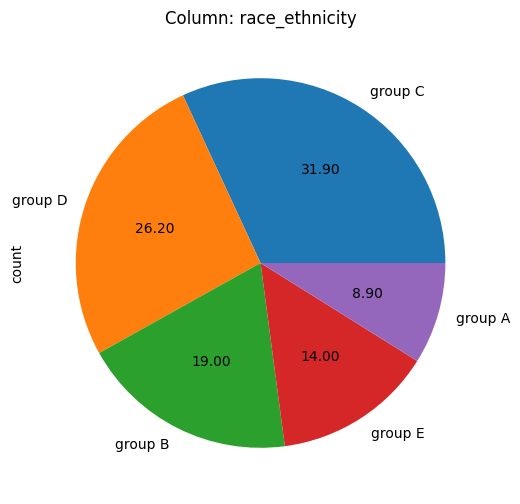

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


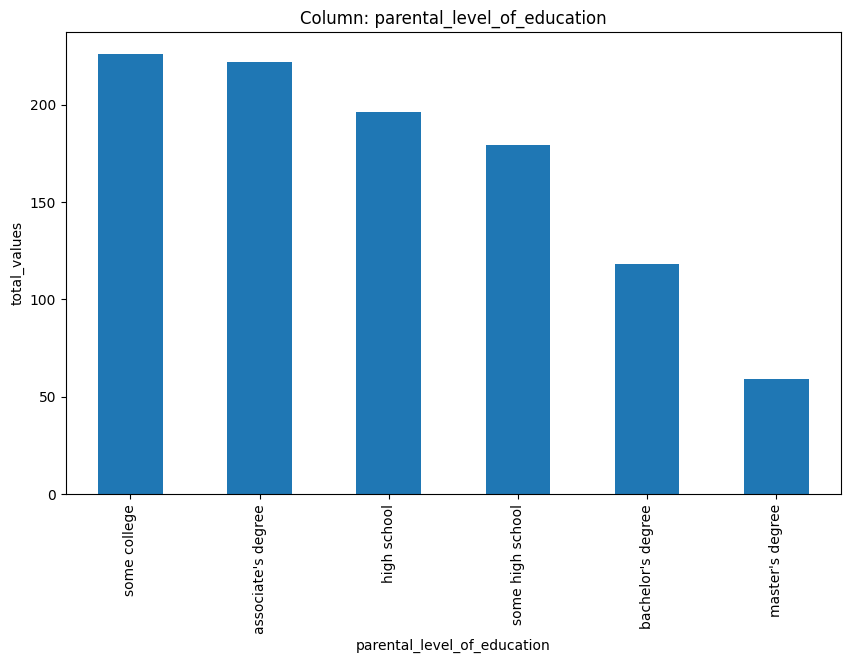

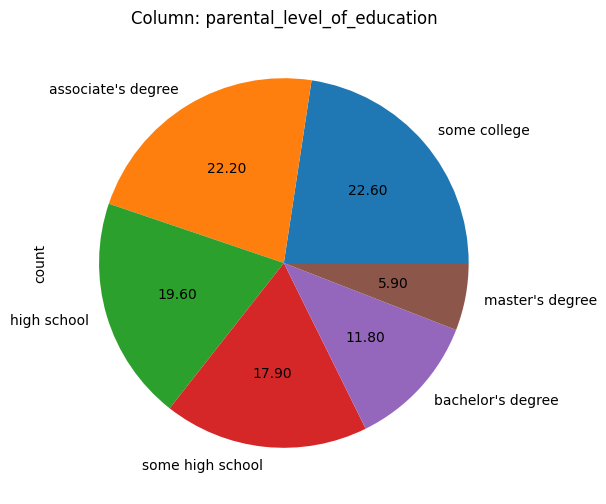

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


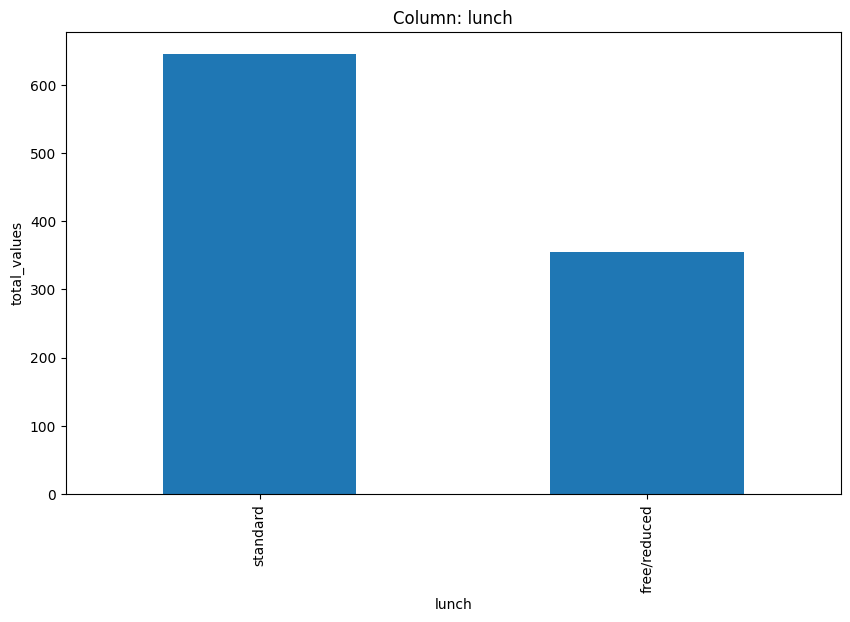

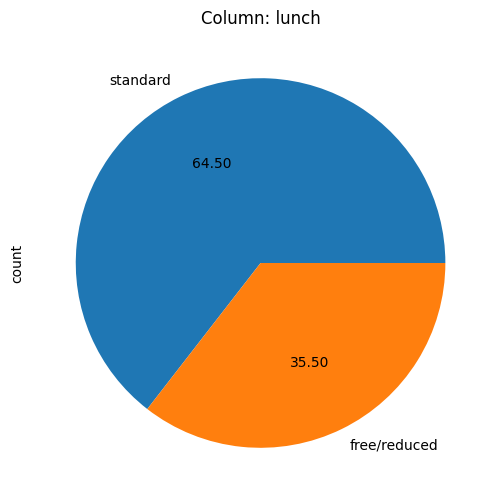

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


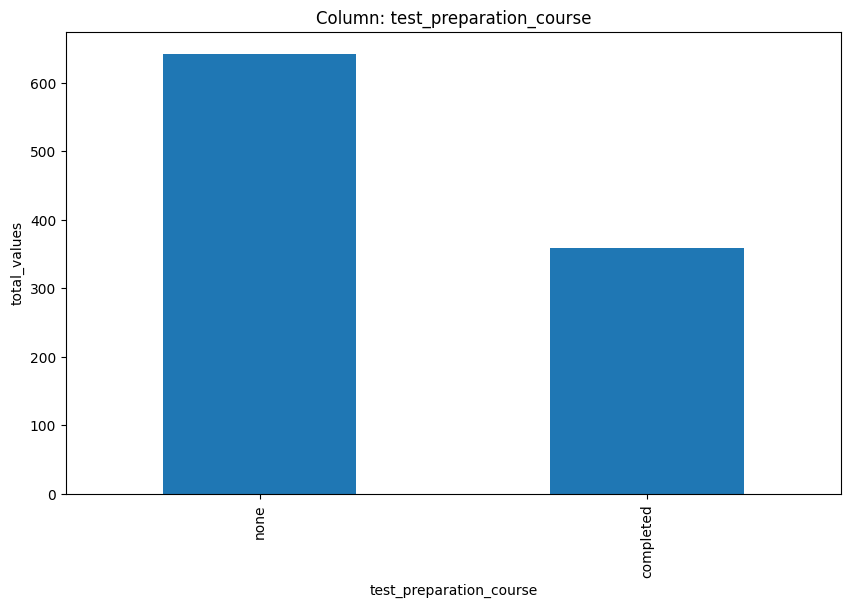

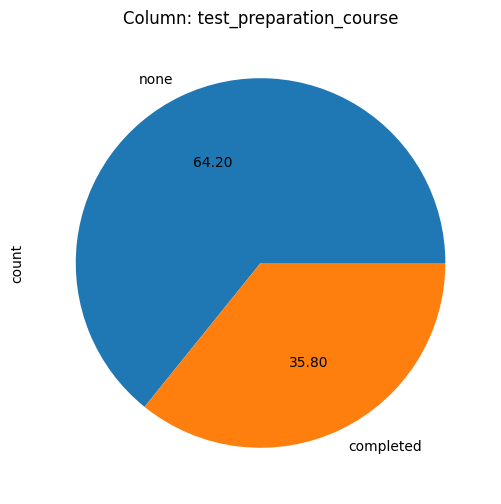

In [11]:
for i in cat:
    analyze_cat(i)

### We can do Data analysis by using the ydata Pandas Profiling 

In [13]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df=df)
profile.to_file("output.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 158.79it/s]


In [14]:
df.groupby('lunch')['math_score'].describe()

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,58.921127,15.159956,0.0,49.0,60.0,69.0,100.0
standard,645.0,70.034109,13.653501,19.0,61.0,69.0,80.0,100.0


<Axes: xlabel='lunch', ylabel='math_score'>

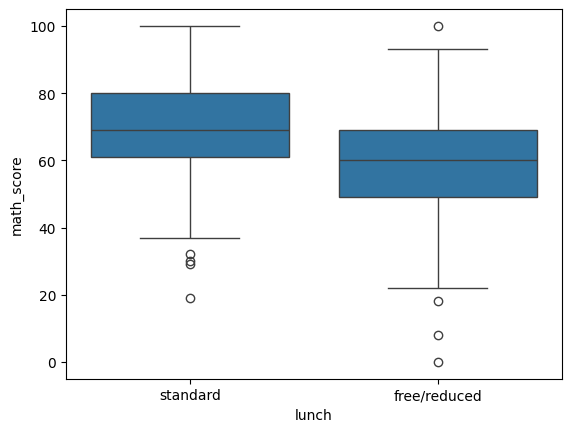

In [15]:
sns.boxplot(x='lunch', y='math_score', data=df)


### Ckeck Duplicate Values

In [17]:
df.duplicated().sum()

np.int64(0)

### Check Datatype

In [19]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Checking the number of unique value in each column

In [20]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [25]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
cat

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [27]:
num

['math_score', 'reading_score', 'writing_score']

### Adding columns for "Total Score" and "Average"

In [34]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']

In [35]:
df['average'] = df['total_score']/3

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Some more details/Insights from the data

In [59]:
# We will going to do it after some time 